## Business Understanding

Task 1: Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

#  The Dataset
The synthesised transaction dataset contains 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

## Importing the required libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [5]:
ANZ = pd.read_excel(r"C:\Users\seyi\Downloads\ANZ synthesised transaction dataset.xlsx")

In [6]:
ANZ.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [7]:
ANZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
ANZ.shape

(12043, 23)

In the ANZ dataset, there are 23 different columns and 12043 observations

In [9]:
ANZ.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [10]:
ANZ.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


To confirm that we are dealing with 100 hypothetical customers:

In [11]:
ANZ['account'].nunique()

100

## Taking the relevant features

In [12]:
ANZ = ANZ[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
ANZ["date"] = pd.to_datetime(ANZ["date"])
ANZ.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [13]:
Null_values = ANZ.isnull().sum().sort_values(ascending=False)

In [14]:
Null_values

merchant_state       4326
merchant_suburb      4326
card_present_flag    4326
movement                0
customer_id             0
amount                  0
age                     0
gender                  0
date                    0
balance                 0
status                  0
dtype: int64

## Exploratory Data Analysis (including Visualizations)

### Total number of autorized and posted status

In [15]:
ANZ['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

### Total number of transactions made on each day

In [16]:
ANZ['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### Total number of transactions made by each customer

In [17]:
ANZ['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Transaction volume made by customers each day

In [18]:
ANZ_date_count = ANZ.groupby('date').count()

In [19]:
transaction_volume = ANZ_date_count['customer_id'].mean()

In [20]:
length = len(ANZ_date_count.index)

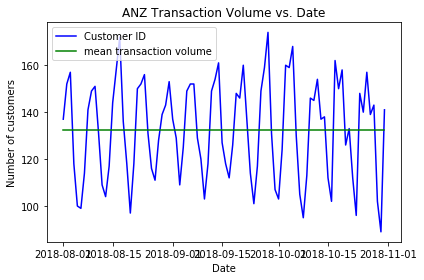

In [21]:
plt.figure()
plt.plot(ANZ_date_count.index, ANZ_date_count["customer_id"], c="blue", label = "Customer ID")
plt.plot(ANZ_date_count.index, np.linspace(transaction_volume,transaction_volume,length), c="g", label = "mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

## What is the average transaction amount?

In [22]:
ANZ_date_mean = ANZ.groupby('date').mean()

In [23]:
transaction_amount = ANZ_date_count['amount'].mean()

In [24]:
length = len(ANZ_date_count.index)

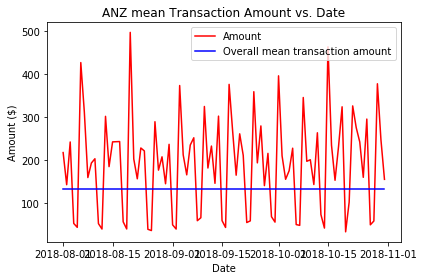

In [25]:
plt.figure()
plt.plot(ANZ_date_count.index, ANZ_date_mean["amount"], c="red", label = "Amount")
plt.plot(ANZ_date_count.index, np.linspace(transaction_amount,transaction_amount,length), c="b", label = "Overall mean transaction amount")
plt.title("ANZ mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

## What is the average customer balance and payment amount by Age

In [26]:
months = []
for date in ANZ["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

ANZ["Months"] = months
ANZ["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

### For August:

In [27]:
ANZ_cus_aug = ANZ[ANZ["Months"] == "August"].groupby("customer_id").mean()

In [28]:
ANZ_gen_aug = ANZ[ANZ["Months"] == "August"].groupby("gender").mean()

In [29]:
mean_f_bal_aug = ANZ_gen_aug["balance"].iloc[0]
mean_m_bal_aug = ANZ_gen_aug["balance"].iloc[1]
length = len(ANZ_cus_aug["age"])

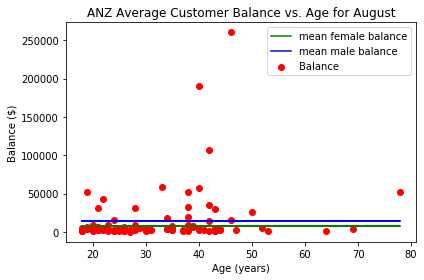

In [47]:
plt.figure()
plt.scatter(ANZ_cus_aug["age"], ANZ_cus_aug["balance"], c="red", label="Balance")
plt.plot(ANZ_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,length), c="g", label = "mean female balance")
plt.plot(ANZ_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,length), c="b", label = "mean male balance")
plt.title("ANZ Average Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [31]:
mean_f_amt_aug = ANZ_gen_aug["amount"].iloc[0]
mean_m_amt_aug = ANZ_gen_aug["amount"].iloc[1]

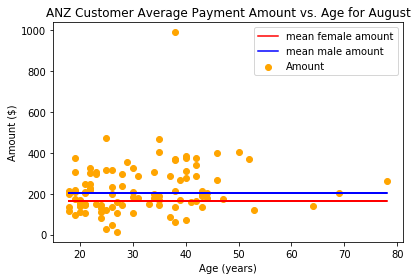

In [48]:
plt.scatter(ANZ_cus_aug["age"], ANZ_cus_aug["amount"], c="orange", label="Amount")
plt.plot(ANZ_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,length), c="r", label = "mean female amount")
plt.plot(ANZ_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,length), c="b", label = "mean male amount")
plt.title("ANZ Customer Average Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

### For September:

In [33]:
ANZ_cus_sep = ANZ[ANZ["Months"] == "September"].groupby("customer_id").mean()
ANZ_gen_sep = ANZ[ANZ["Months"] == "September"].groupby("gender").mean()

In [34]:
mean_f_bal_sep = ANZ_gen_sep["balance"].iloc[0]
mean_m_bal_sep = ANZ_gen_sep["balance"].iloc[1]
length = len(ANZ_cus_sep["age"])

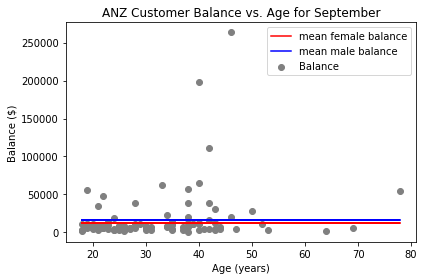

In [49]:
plt.figure()
plt.scatter(ANZ_cus_sep["age"], ANZ_cus_sep["balance"], c="grey", label="Balance")
plt.plot(ANZ_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,length), c="r", label = "mean female balance")
plt.plot(ANZ_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,length), c="b", label = "mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [36]:
mean_f_amt_sep = ANZ_gen_sep["amount"].iloc[0]
mean_m_amt_sep = ANZ_gen_sep["amount"].iloc[1]

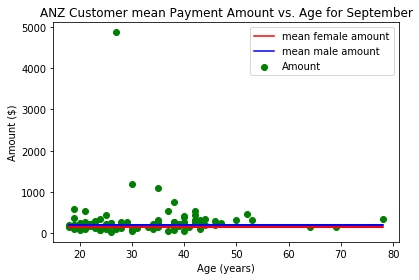

In [37]:
plt.scatter(ANZ_cus_sep["age"], ANZ_cus_sep["amount"], c="green", label="Amount")
plt.plot(ANZ_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,length), c="r", label = "mean female amount")
plt.plot(ANZ_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,length), c="b", label = "mean male amount")
plt.title("ANZ Customer mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

### For October:

In [38]:
ANZ_cus_oct = ANZ[ANZ["Months"] == "October"].groupby("customer_id").mean()
ANZ_gen_oct = ANZ[ANZ["Months"] == "October"].groupby("gender").mean()

In [39]:
mean_f_bal_oct = ANZ_gen_oct["balance"].iloc[0]
mean_m_bal_oct = ANZ_gen_oct["balance"].iloc[1]
length = len(ANZ_cus_oct["age"])

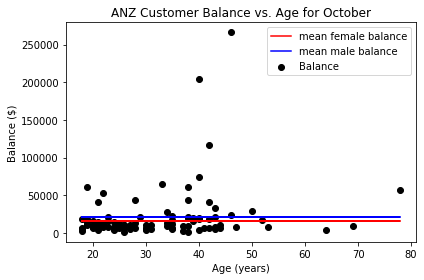

In [40]:
plt.figure()
plt.scatter(ANZ_cus_oct["age"], ANZ_cus_oct["balance"], c="black", label="Balance")
plt.plot(ANZ_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,length), c="r", label = "mean female balance")
plt.plot(ANZ_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,length), c="b", label = "mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [41]:
mean_f_amt_oct = ANZ_gen_oct["amount"].iloc[0]
mean_m_amt_oct = ANZ_gen_oct["amount"].iloc[1]

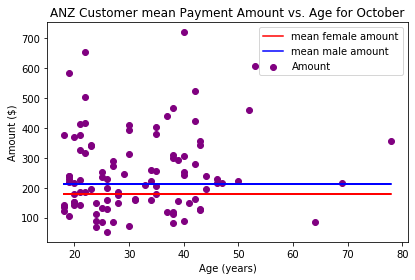

In [42]:
plt.scatter(ANZ_cus_oct["age"], ANZ_cus_oct["amount"], c="purple", label="Amount")
plt.plot(ANZ_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,length), c="r", label = "mean female amount")
plt.plot(ANZ_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,length), c="b", label = "mean male amount")
plt.title("ANZ Customer mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

Using an heatmap: 

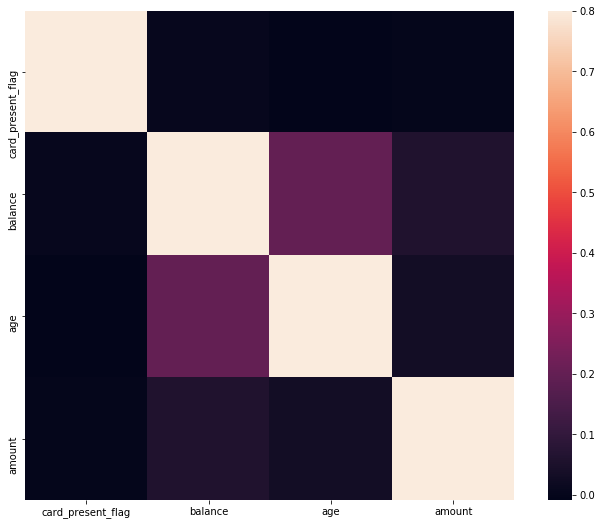

In [46]:
corrmat = ANZ.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);